# More `ggplot` Figures Peer Review

## PUT YOUR NAME HERE: Marcio Woitek

In [1]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(GGally))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(ggalt))
suppressPackageStartupMessages(library(ggcorrplot))

## Problem 1

Create the figure in the solution for Problem 1 using the data included in the
R Markdown file.

In [2]:
set.seed(12345)
var1 <- runif(50, 0, 10)

set.seed(12345)
var2 <- var1 + rnorm(50, 5, 2)

set.seed(12345)
var3 <- var1 * (-rnorm(50, 1, .2))

dat1 <- tibble(var1, var2, var3)

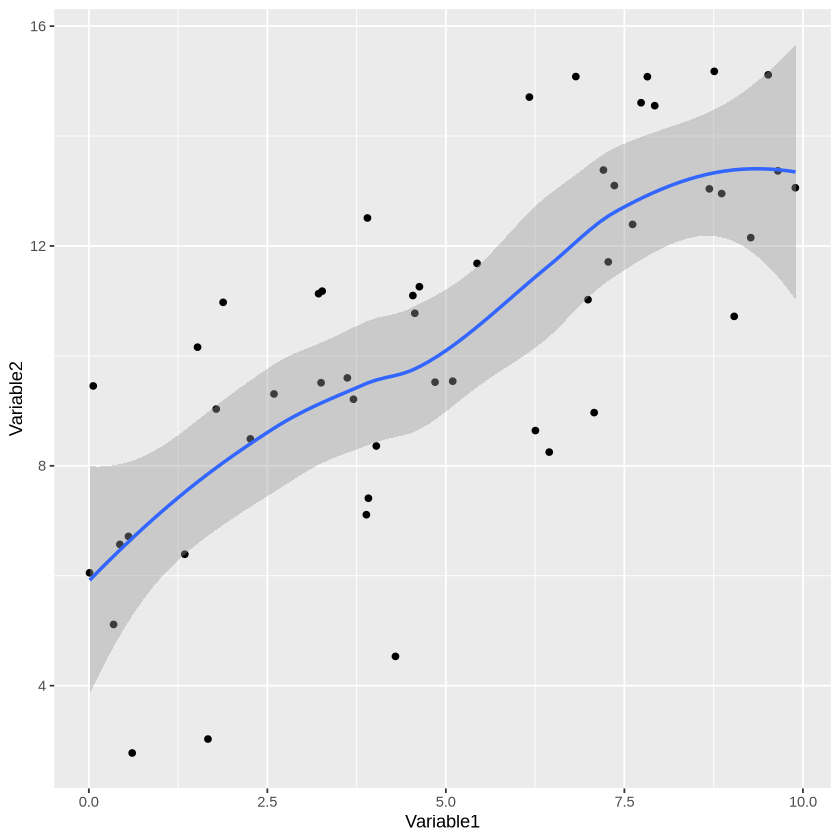

In [3]:
ggplot2::ggplot(data = dat1, mapping = ggplot2::aes(x = var1, y = var2)) +
    ggplot2::geom_point(position = "jitter") +
    ggplot2::geom_smooth(formula = y ~ x, method = "loess") +
    ggplot2::labs(x = "Variable1", y = "Variable2")

## Problem 2

Create the figure in the solution for Problem 2 using the data included in the
R Markdown file.

In [4]:
set.seed(10)
var1 <- runif(50, 0, 10)

set.seed(10)
var2 <- var1 + rnorm(50, 5, 2)

set.seed(10)
var3 <- var1 * (-rnorm(50, 1, .2))

dat2 <- tibble(var1, var2, var3)

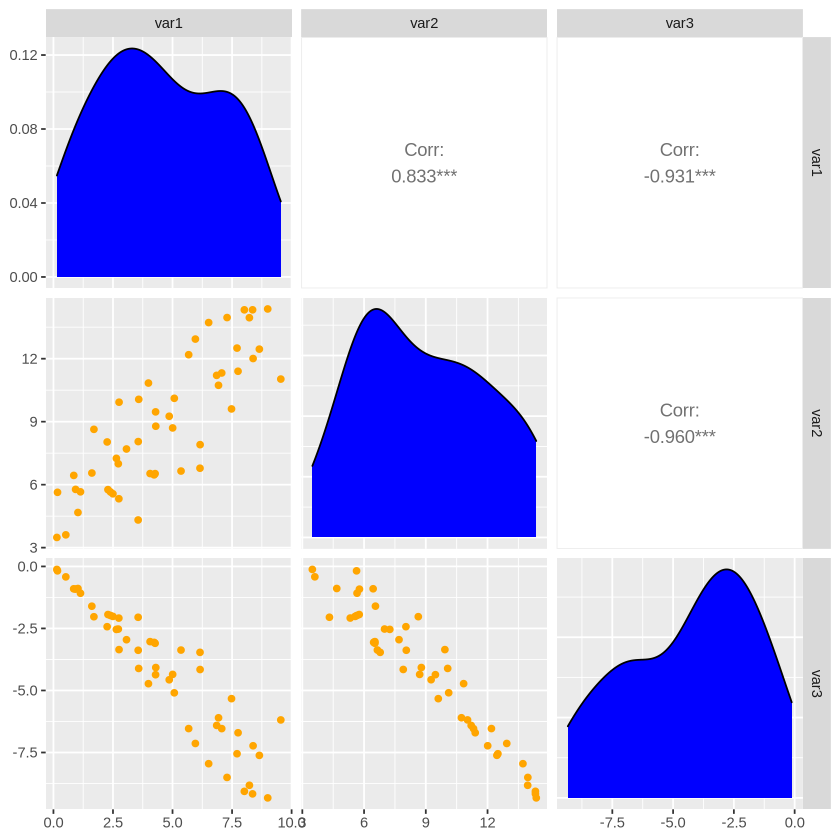

In [5]:
# Custom function for the density plots:
my_density <- function(data, mapping) {
    ggplot2::ggplot(data = data, mapping = mapping) +
        ggplot2::geom_density(fill = "blue")
}

# Custom function for the scatter plots:
my_scatter <- function(data, mapping) {
    ggplot2::ggplot(data = data, mapping = mapping) +
        ggplot2::geom_point(color = "orange", position = "jitter")
}

# Plot the figure:
GGally::ggpairs(
    data = dat2,
    diag = list(continuous = my_density),
    lower = list(continuous = my_scatter)
)

## Problem 3

Create the figure in the solution for Problem 3 using the data included in the
R Markdown file.

In [6]:
set.seed(12)
var1 <- runif(50, 0, 10)

set.seed(12)
var2 <- var1 + rnorm(50, 5, 2)

set.seed(12)
var3 <- var1 * (-rnorm(50, 1, .2))

dat3 <- tibble(var1, var2, var3)

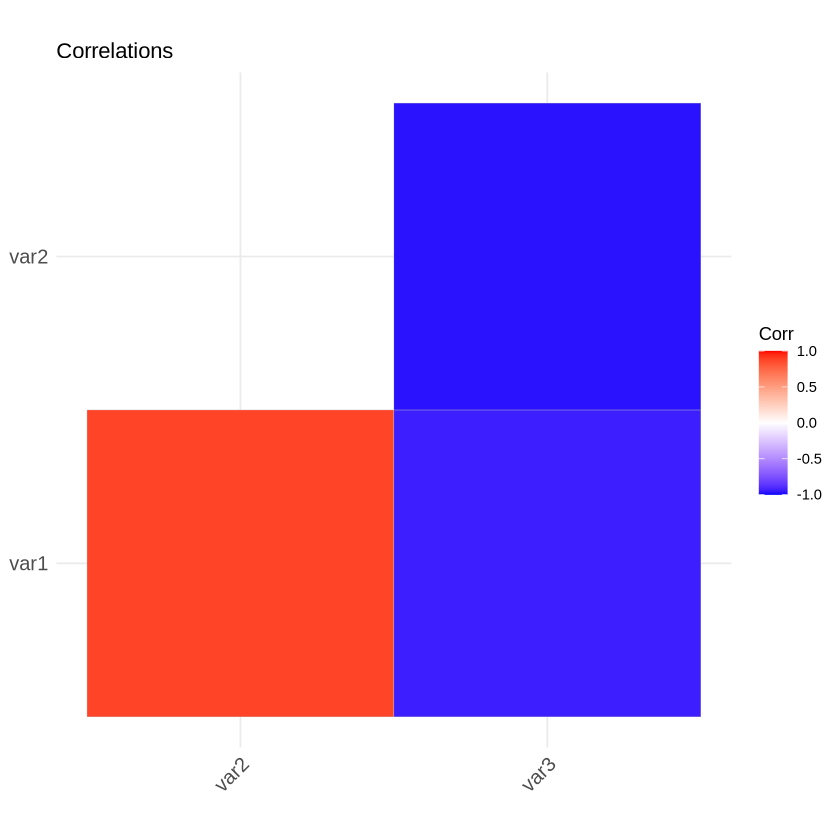

In [7]:
# Compute the correlations:
corrs <- cor(dat3)

# Plot the figure:
ggcorrplot::ggcorrplot(
    corr = corrs,
    title = "Correlations",
    type = "lower"
)

## Problem 4

Create the figure in the solution for Problem 4 using the data included in the
R Markdown file.

In [8]:
set.seed(5678)
var1 <- rnorm(10, 25, 5)

names <- letters[1:10]

dat4 <- tibble(names, var1)

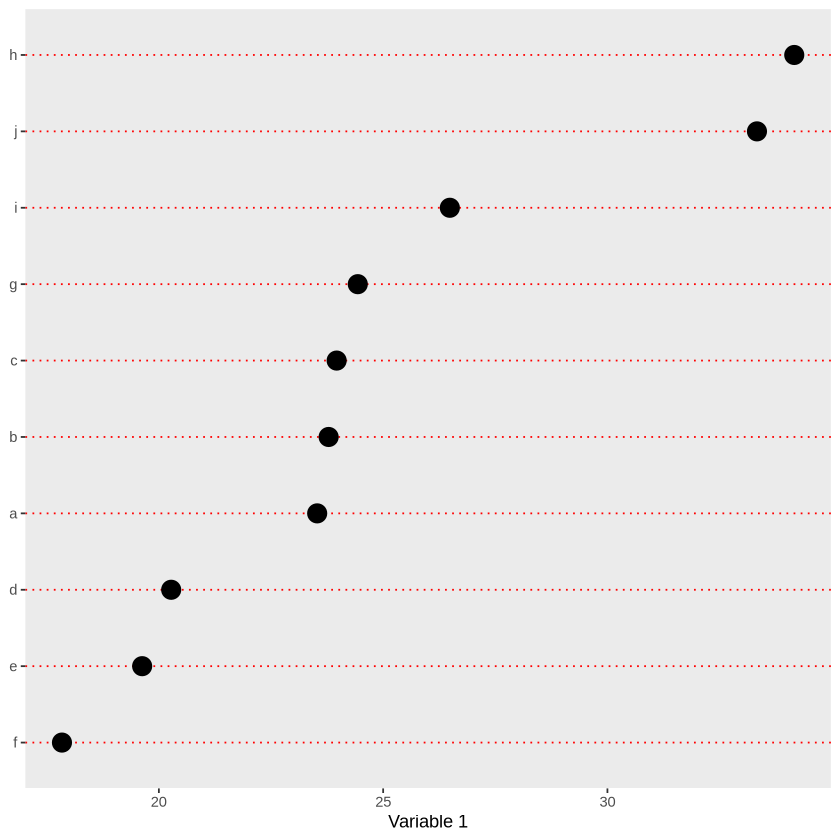

In [9]:
ggplot2::ggplot(
    data = dat4,
    mapping = ggplot2::aes(x = var1, y = reorder(names, var1))
) +
    ggplot2::geom_point(size = 5) +
    ggplot2::labs(x = "Variable 1") +
    ggplot2::theme(
        axis.title.y = ggplot2::element_blank(),
        panel.grid.major.x = ggplot2::element_blank(),
        panel.grid.minor.x = ggplot2::element_blank(),
        panel.grid.major.y = ggplot2::element_line(
            color = "red",
            linetype = "dotted"
        )
    )

## Problem 5

Create the figure in the solution for Problem 5 using the data included in the
R Markdown file.

In [10]:
set.seed(13)
var1 <- rnorm(10, 25, 5)

names <- letters[1:10]

dat5 <- tibble(names, var1)

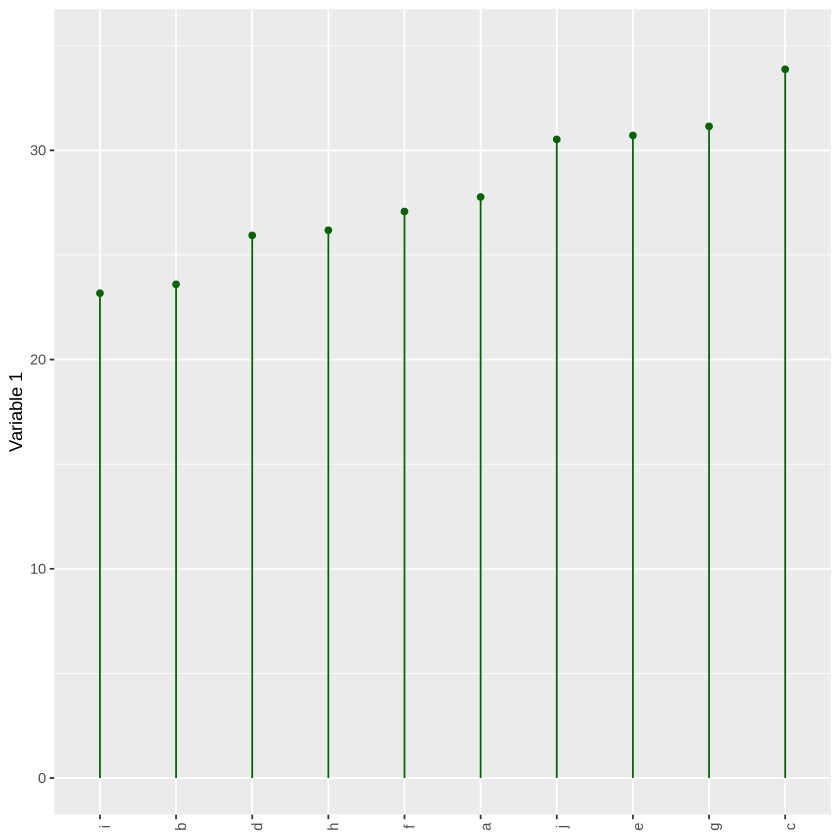

In [11]:
ggplot2::ggplot(
    data = dat5,
    mapping = ggplot2::aes(x = reorder(names, var1), y = var1)
) +
    ggplot2::geom_point(color = "darkgreen") +
    ggplot2::geom_segment(
        x = names,
        xend = names,
        y = 0,
        yend = var1,
        color = "darkgreen"
    ) +
    ggplot2::labs(y = "Variable 1") +
    ggplot2::theme(
        axis.text.x = ggplot2::element_text(angle = 90),
        axis.title.x = ggplot2::element_blank()
    ) +
    ggplot2::scale_y_continuous(limits = c(0, 35))

## Problem 6

Create the figure in the solution for Problem 6 using the data included in the
R Markdown file.

In [12]:
set.seed(8)
fiction <- tibble(
    Genre = rep("Fiction", 5),
    Time = seq(1:5),
    Total = sample(1:10, 5)
)

set.seed(7)
biography <- tibble(
    Genre = rep("Biography", 5),
    Time = seq(1:5),
    Total = sample(1:10, 5)
)

set.seed(9)
mystery <- tibble(
    Genre = rep("Mystery", 5),
    Time = seq(1:5),
    Total = sample(1:10, 5)
)

books_checked_out <- bind_rows(fiction, biography, mystery)

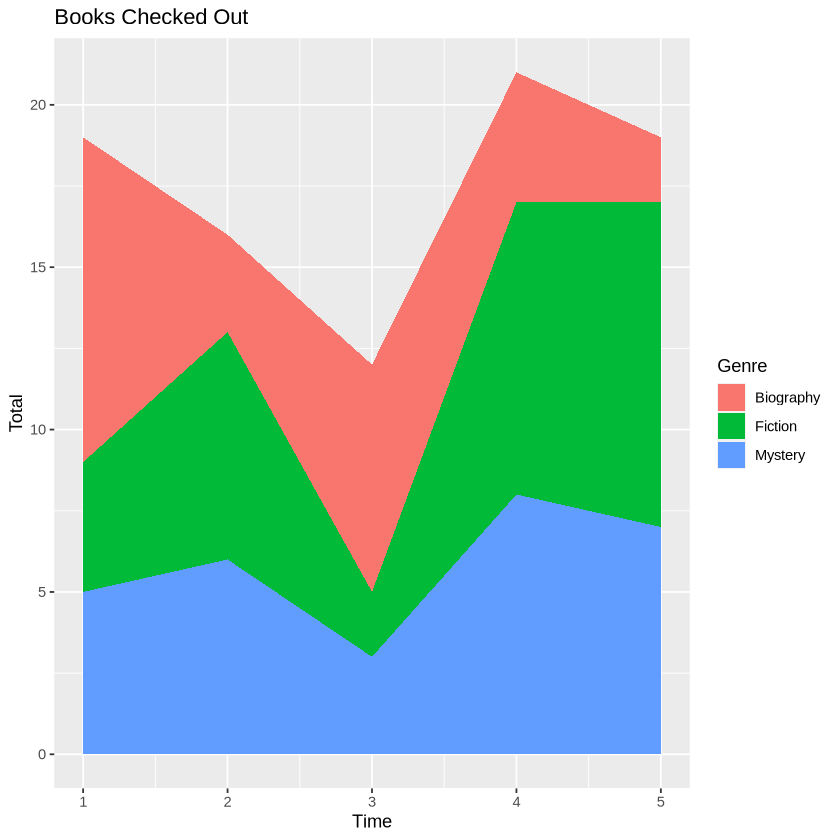

In [13]:
ggplot2::ggplot(
    data = books_checked_out,
    mapping = ggplot2::aes(x = Time, y = Total, fill = Genre)
) +
    ggplot2::geom_area() +
    ggplot2::labs(title = "Books Checked Out")

## Problem 7

Create the figure in the solution for Problem 7 using the data included in the
R Markdown file.

In [14]:
books_checked_out2 <- books_checked_out %>%
    filter(Time == 1 | Time == 5) %>%
    pivot_wider(names_from = Time, values_from = Total) %>%
    rename(Time1 = `1`, Time5 = `5`)

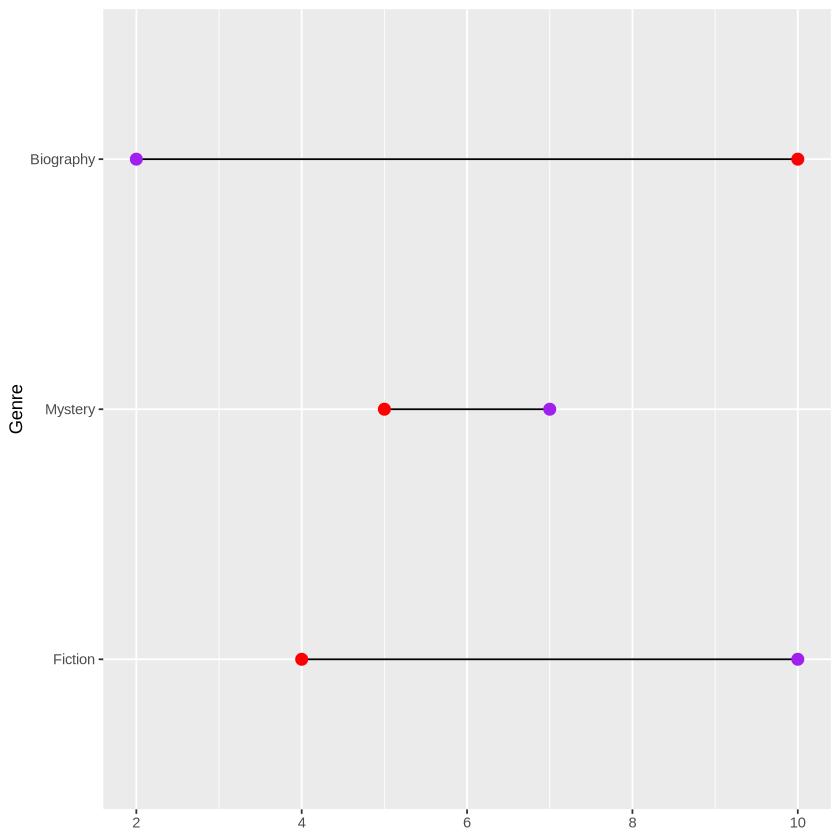

In [15]:
ggplot2::ggplot(
    data = books_checked_out2,
    mapping = ggplot2::aes(x = Time1, xend = Time5, y = reorder(Genre, Time1))
) +
    ggalt::geom_dumbbell(
        colour_x = "red",
        size_x = 3,
        colour_xend = "purple",
        size_xend = 3
    ) +
    ggplot2::labs(y = "Genre") +
    ggplot2::theme(axis.title.x = ggplot2::element_blank())

## Problem 8

Create the figure in the solution for Problem 8 using the data included in the
R Markdown file.

In [16]:
pie_dat <- c(1, 2, 3, 4, 5)

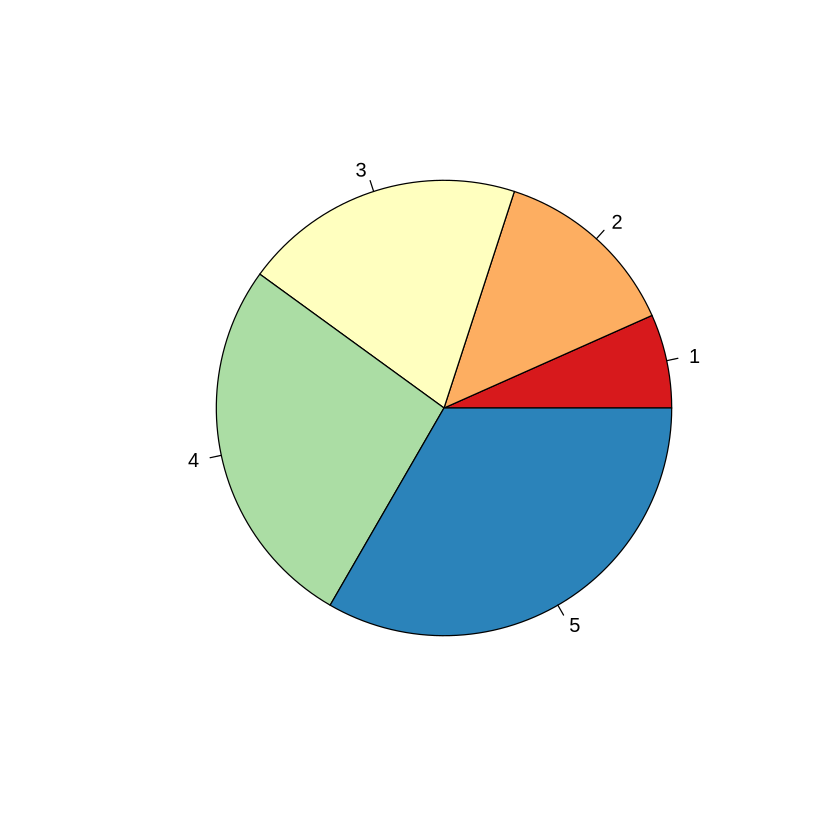

In [17]:
my_color <- brewer.pal(5, "Spectral")
pie(pie_dat, col = my_color)